# Allison Fellhauer

### Research question/interests
I am interested in examining mental health outcomes as it relates to age. Specifically, I would like to see if there are age-specific clusters for those who enjoy specific genres of music and those with differing relationships with music (e.g. composer, instrumentalist, listener) and how that relates to their mental health scores.e.

### Required packages:

In [1]:
# pip install pandas

In [2]:
# pip install altair

In [3]:
# pip install toolz

In [4]:
import numpy as np
import pandas as pd
import altair as alt
import os
from toolz.curried import pipe

# Create a new data transformer that stores the files in a directory
def json_dir(data, data_dir='altairdata'):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + '/{prefix}-{hash}.{extension}') )

# Register and enable the new transformer
alt.data_transformers.register('json_dir', json_dir)
alt.data_transformers.enable('json_dir')

# Handle large data sets (default shows only 5000)
# See here: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.disable_max_rows()

alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [5]:
np.random.seed(42)

## 1. Loading Dataset

In [6]:
DATA_PATH = "../../data/raw/mxmh_survey_results.csv"
music = pd.read_csv(DATA_PATH, parse_dates=["Timestamp"])

## 2. Data Cleaning

### 2.1 Attribute Investigation

The first step of EDA is to examine the data itself and see what dataypes we are dealing with (Quantitative, Categorical, Temporal, or Ordinal)

In [7]:
music.head(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2022-08-27 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,2022-08-27 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [8]:
music.shape

(736, 33)

In [9]:
music_info = pd.DataFrame({
    "Column": music.columns,
    "Non-Null Count": music.count().values,
    "Dtype": music.dtypes.values
})

music_info.sort_values("Non-Null Count", ascending=True)

,Column,Non-Null Count,Dtype
10,BPM,629,float64
31,Music effects,728,object
9,Foreign languages,732,object
5,Instrumentalist,732,object
4,While working,733,object
6,Composer,735,object
1,Age,735,float64
2,Primary streaming service,735,object
7,Fav genre,736,object
3,Hours per day,736,float64


Now, we can separate the columns according to their data type.

In [10]:
categorical = [
    "Primary streaming service",
    "While working",
    "Instrumentalist",
    "Composer",
    "Fav genre",
    "Exploratory",
    "Foreign languages",
    'Frequency [Classical]',
    'Frequency [Country]', 
    'Frequency [EDM]', 
    'Frequency [Folk]',
    'Frequency [Gospel]', 
    'Frequency [Hip hop]', 
    'Frequency [Jazz]',
    'Frequency [K pop]', 
    'Frequency [Latin]', 
    'Frequency [Lofi]',
    'Frequency [Metal]', 
    'Frequency [Pop]', 
    'Frequency [R&B]',
    'Frequency [Rap]', 
    'Frequency [Rock]', 
    'Frequency [Video game music]',
    'Music effects'
]

numerical = [
    "Age", 
    "Hours per day",
    "BPM",
    "Anxiety",
    "Depression", 
    "Insomnia",
    "OCD"
] 

temporal = [
    "Timestamp"
]

target = ["Music effects"]

dropped = ["Permissions"]

print(len(categorical) + len(numerical) + len(dropped) + len(temporal)) #Ensure no columns were forgotten!


33


Next, let's see the cardinality of the categorical variables.

In [11]:
unique_counts_music = pd.DataFrame({
    "Column": categorical,
    "Unique Count": [music[col].nunique() for col in categorical],
    "Unique Values": [music[col].unique() for col in categorical]
})

unique_counts_music = unique_counts_music.sort_values("Unique Count", ascending=False)
unique_counts_music

,Column,Unique Count,Unique Values
4,Fav genre,16,"[Latin, Rock, Video game music, Jazz, R&B, K p..."
0,Primary streaming service,6,"[Spotify, Pandora, YouTube Music, I do not use..."
7,Frequency [Classical],4,"[Rarely, Sometimes, Never, Very frequently]"
12,Frequency [Hip hop],4,"[Sometimes, Rarely, Never, Very frequently]"
11,Frequency [Gospel],4,"[Never, Sometimes, Rarely, Very frequently]"
10,Frequency [Folk],4,"[Never, Rarely, Sometimes, Very frequently]"
9,Frequency [EDM],4,"[Rarely, Never, Very frequently, Sometimes]"
8,Frequency [Country],4,"[Never, Sometimes, Very frequently, Rarely]"
16,Frequency [Lofi],4,"[Rarely, Sometimes, Very frequently, Never]"
17,Frequency [Metal],4,"[Never, Sometimes, Rarely, Very frequently]"


### 2.2 Convert `Frequency [genre]` to Ordered Variable

From the unique values, we can see that the frequency of each genre are on a consistent and ordered scale. We can convert them into the pandas categorical data type and assign them an order. 

In [12]:
order = ["Never", "Rarely", "Sometimes", "Very frequently"]

for col in music.columns:
    if "Frequency" in col:
        music[col] = pd.Categorical(music[col], categories=order, ordered=True)

music_info_updated = pd.DataFrame({
    "Column": music.columns,
    "Non-Null Count": music.count().values,
    "Dtype": music.dtypes.values
})

music_info_updated.sort_values("Non-Null Count", ascending=True)

,Column,Non-Null Count,Dtype
10,BPM,629,float64
31,Music effects,728,object
9,Foreign languages,732,object
5,Instrumentalist,732,object
4,While working,733,object
6,Composer,735,object
1,Age,735,float64
2,Primary streaming service,735,object
7,Fav genre,736,object
3,Hours per day,736,float64


### 2.3 Handling NA's 

It's important to assess the number of missing values in each column to develop an effective strategy for handling them.

In [13]:
na_counts_music = pd.DataFrame({
    "Column": music.columns,
    "Missing Values": [music[col].isna().sum() for col in music.columns]
})

na_counts_music["proportion"] = na_counts_music["Missing Values"]/len(music) * 100
na_counts_music = na_counts_music.round(2)
na_counts_music = na_counts_music.sort_values("proportion", ascending=False)
columns_with_nas = na_counts_music[na_counts_music["proportion"] > 0]
columns_with_nas

,Column,Missing Values,proportion
10,BPM,107,14.54
31,Music effects,8,1.09
9,Foreign languages,4,0.54
5,Instrumentalist,4,0.54
4,While working,3,0.41
2,Primary streaming service,1,0.14
6,Composer,1,0.14
1,Age,1,0.14


BPM has a large amount of NA's. Let's investigate BPM further.

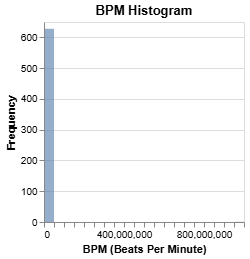

In [14]:
hist_bpm_unprocessed= alt.Chart(music).mark_bar(opacity=0.6).encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=30), title="BPM (Beats Per Minute)"),
    alt.Y("count()", title="Frequency"),
).properties(
    title="BPM Histogram",
    height = 200,
    width = 200
)
hist_bpm_unprocessed

Something is causing quite the skew! We need to handle this before we can strategize handling NA's.

#### 2.3.1 Cleaning BPM

In [15]:
music.describe()["BPM"]

count    6.290000e+02
mean     1.589948e+06
min      0.000000e+00
25%      1.000000e+02
50%      1.200000e+02
75%      1.440000e+02
max      1.000000e+09
std      3.987261e+07
Name: BPM, dtype: float64

BPM has some _massive_ outliers!

In [16]:
sorted_bpm = music["BPM"].dropna().sort_values(ascending=True)

print("Lowest 10 BPM values:")
print(sorted_bpm.head(10))

print("\nHighest 10 BPM values:")
print(sorted_bpm.tail(10))

Lowest 10 BPM values:
339     0.0
639     0.0
524     0.0
429     4.0
567     8.0
372    20.0
421    40.0
214    52.0
427    55.0
58     55.0
Name: BPM, dtype: float64

Highest 10 BPM values:
296          200.0
498          204.0
353          208.0
564          210.0
711          210.0
662          218.0
610          220.0
248          220.0
644          624.0
568    999999999.0
Name: BPM, dtype: float64


The top two values are outliers, so are the bottom 5. Let's narrow the range and try displaying the data again.

In [17]:
maxOutlierBPM = min(music["BPM"].nlargest(2))
minOutlierBPM = max(music["BPM"].nsmallest(5))

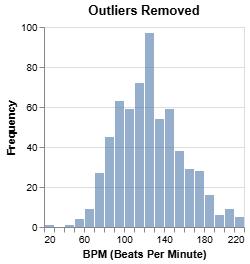

In [18]:
hist_bpm_outliers_removed= alt.Chart(
    music[(music["BPM"] < maxOutlierBPM) & (music["BPM"] > minOutlierBPM)]
).mark_bar(opacity=0.6).encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=30), title="BPM (Beats Per Minute)"),
    alt.Y("count()", title="Frequency"),
).properties(
    title="Outliers Removed",
    height = 200,
    width = 200
)
hist_bpm_outliers_removed

In [19]:
droppedMax = music["BPM"].nlargest(2).index
droppedMin = music["BPM"].nsmallest(5).index
droppedOutliers = droppedMax.union(droppedMin)
music_cleaned = music.drop(index=droppedOutliers)
print(min(music_cleaned["BPM"]))
print(max(music_cleaned["BPM"]))

20.0
220.0


Next, we will handle the missing values. Let's visualize the data using different methods.

In [20]:
music_imputed_mean = music_cleaned.copy()
music_imputed_mean["BPM"] = music_imputed_mean["BPM"].fillna(music_cleaned["BPM"].mean())
music_imputed_median = music_cleaned.copy()
music_imputed_median["BPM"] = music_imputed_median["BPM"].fillna(music_cleaned["BPM"].median())
music_dropped = music_cleaned.dropna(subset=["BPM"])

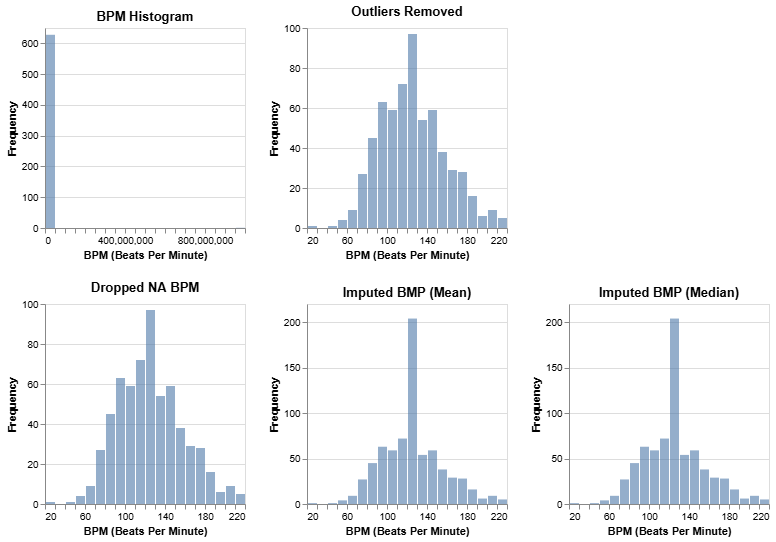

In [21]:
hist_bpm_imputed_mean = alt.Chart(
    music_imputed_mean
).mark_bar(opacity=0.6).encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=30), title="BPM (Beats Per Minute)"),
    alt.Y("count()", title="Frequency"),
).properties(
    title="Imputed BMP (Mean)",
    height = 200,
    width = 200
)
hist_bpm_imputed_median = alt.Chart(
    music_imputed_median
).mark_bar(opacity=0.6).encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=30), title="BPM (Beats Per Minute)"),
    alt.Y("count()", title="Frequency"),
).properties(
    title="Imputed BMP (Median)",
    height = 200,
    width = 200
)
hist_bpm_dropped = alt.Chart(
    music_dropped
).mark_bar(opacity=0.6).encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=30), title="BPM (Beats Per Minute)"),
    alt.Y("count()", title="Frequency"),
).properties(
    title="Dropped NA BPM", 
    height = 200,
    width = 200
)
(hist_bpm_unprocessed | hist_bpm_outliers_removed) & (hist_bpm_dropped | hist_bpm_imputed_mean | hist_bpm_imputed_median)

Imputing using mean or median is causing a large peak at the mean/median. Let's try imputing using trends in the data. I've decided to fill using random sampling using the probabilities of each value to avoid excessive "rare" values being chosen.

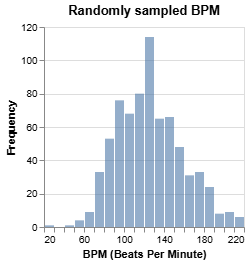

In [22]:
bpm_values = music_cleaned["BPM"].dropna()
bpm_probs = bpm_values.value_counts(normalize=True) 
music_filled_random_sampling = music_cleaned.copy()

music_filled_random_sampling["BPM"] = music_cleaned["BPM"].apply(
    lambda x: np.random.choice(bpm_probs.index, p=bpm_probs.values) if pd.isna(x) else x
)

hist_music_sampled = alt.Chart(
    music_filled_random_sampling
).mark_bar(opacity=0.6).encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=30), title="BPM (Beats Per Minute)"),
    alt.Y("count()", title="Frequency"),
).properties(
    title="Randomly sampled BPM", 
    height = 200,
    width = 200
)
hist_music_sampled

Since there are so many missing values and we want to preserve the rows and the original shape without a massive peak at the centre, using random sampling may be a better approach. I will use this method to fill the NA's for bpm.

In [23]:
music_cleaned_imputed = music_filled_random_sampling.copy()
music_cleaned_imputed["BPM"].isna().sum()

np.int64(0)

#### 2.3.2 Cleaning Other Columns with NA's

In [24]:
na_counts_music = pd.DataFrame({
    "Column": music_cleaned_imputed.columns,
    "Missing Values": [music_cleaned_imputed[col].isna().sum() for col in music_cleaned_imputed.columns]
})

na_counts_music[na_counts_music["Missing Values"] > 0]

,Column,Missing Values
1,Age,1
2,Primary streaming service,1
4,While working,3
5,Instrumentalist,4
6,Composer,1
9,Foreign languages,4
31,Music effects,8


In [25]:
na_counts_music[na_counts_music["Missing Values"] > 0]["Missing Values"].sum()

np.int64(22)

Since the number of NA's remaining (22) is fairly small, we can go ahead and drop these rows.

In [26]:
music_cleaned_imputed.dropna(inplace=True)

In [27]:
music_cleaned_imputed_count = pd.DataFrame({
    "Column": music_cleaned_imputed.columns,
    "Missing Values": [music_cleaned_imputed[col].isna().sum() for col in music_cleaned_imputed.columns]
})
music_cleaned_imputed_count.sort_values("Missing Values", ascending = False)

,Column,Missing Values
0,Timestamp,0
1,Age,0
2,Primary streaming service,0
3,Hours per day,0
4,While working,0
5,Instrumentalist,0
6,Composer,0
7,Fav genre,0
8,Exploratory,0
9,Foreign languages,0


## 3. Exploratory Data Analysis

### 3.1 Numerical Univariate Analysis

Let's investigate the columns by looking at histograms for each numerical column:

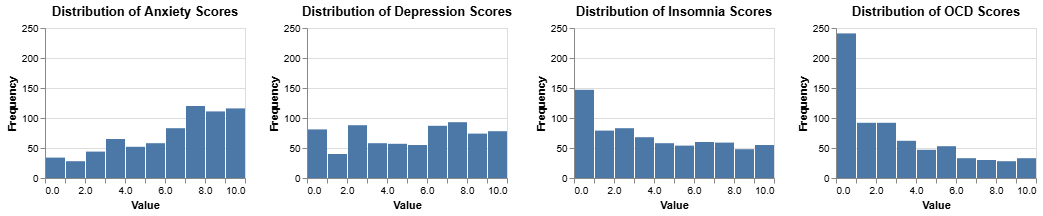

In [28]:
music_mental_illnesses = music_cleaned_imputed.drop(columns=["Age", "Hours per day", "BPM"])
music_mental_illnesses = music_mental_illnesses.drop(columns=categorical)
music_mental_illnesses = music_mental_illnesses.drop(columns=dropped)
music_mental_illnesses = music_mental_illnesses.drop(columns=temporal)

mental_illness_distribution_hist = []

for col in music_mental_illnesses.columns:
    mental_illness_distribution_hist.append(alt.Chart(music_mental_illnesses).mark_bar().encode(
        alt.X(col, type="quantitative", bin=alt.Bin(maxbins=10), title="Value"),
        alt.Y('count()', title="Frequency", scale = alt.Scale(domain=[0, 250]))
    ).properties(
        width=200,
        height=150
    ).properties(
        title="Distribution of " + col + " Scores"
    )
                                           )
allCharts = alt.hconcat(*mental_illness_distribution_hist)
allCharts

We can see that the mental health reporting has values varying between 0 and 10, which matches with the 10 point scale used by the survey. 

- Anxiety has a slight peak towards the larger values (left skewed)
- Depression is fairly flat, which some fluxuation
- Both insomnia and OCD is skewed towards zero (right skewed)

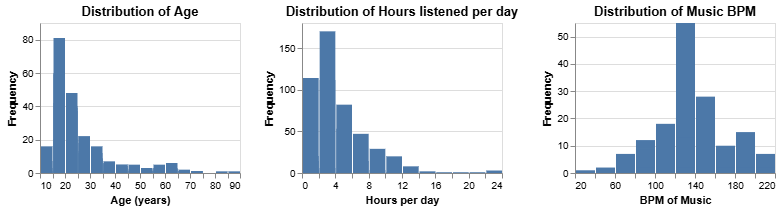

In [29]:
hist_age = alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.X("Age:Q", bin=alt.Bin(maxbins=20), title="Age (years)"),
    alt.Y('count()', title="Frequency"),
    tooltip = ["Age", "count()"]
).properties(
    width=200,
    height=150,
    title="Distribution of Age"
)
hist_hours = alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.X("Hours per day:Q", bin=alt.Bin(maxbins=15), title="Hours per day"),
    alt.Y('count()', title="Frequency"),
    tooltip = ["Hours per day", "count()"]
).properties(
    width=200,
    height=150,
    title="Distribution of Hours listened per day"
)
hist_bpm = alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=15), title="BPM of Music"),
    alt.Y('count()', title="Frequency"),
    tooltip = ["BPM", "count()"]
).properties(
    width=200,
    height=150,
    title="Distribution of Music BPM"
)

hist_age | hist_hours | hist_bpm


Based on the plots:
- Respondant age skews younger, which is unsurprising considering that the survey was published using online forums and social media sites.
- Distribution of hours listened per day is skewed towards 0-8 hours, with a three people listening 24 hours a day.
- BPM, now that it has been cleaned and sliced, displays a tendency for individuals to listen to music around 120 bpm. 

### 3.2 Categorical Univariate Analysis

To start, let's see which are the most popular genres.

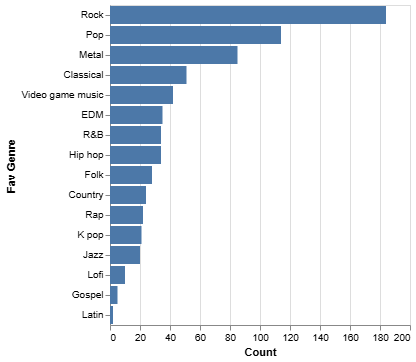

In [30]:
alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.Y("Fav genre:N", title="Fav Genre", sort = "-x"),
    alt.X("count(Fav genre)", title="Count"), 
    alt.Tooltip(["Fav genre", "count(Fav genre):Q"])
)

It seems as though Rock, Pop, Metal and Classical are the top genres. Although it is interesting to examine all genres, it may be challenging to compare Latin which only got 2 votes vs. rock which got 184. Perhaps it would be more meaningful to examine the within-genre variation for just the top four.

I also want to examine the instrumentalist and composer columns to see the break down of those who play/make music vs. those who do not.

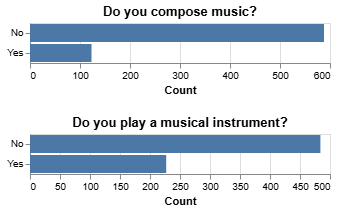

In [31]:
composer = alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.Y("Composer:N", title=None, sort = "-x"),
    alt.X("count(Composer)", title="Count"), 
    alt.Tooltip(["Composer", "count(Composer):Q"])
).properties(
    title = "Do you compose music?"
)

instrumentalist = alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.Y("Instrumentalist:N", title=None, sort = "-x"),
    alt.X("count(Instrumentalist)", title="Count"), 
    alt.Tooltip(["Instrumentalist", "count(Instrumentalist):Q"])
).properties(
    title = "Do you play a musical instrument?"
)

composer & instrumentalist

Based on the plots:
- Most respondants do not compose music compared to those who do
- Most respondants do not play a musical instrument compared to those that do.

Let's make a new chart to show those who do neither.

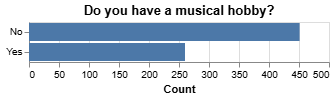

In [32]:
music_cleaned_imputed['Has_musical_hobbies'] = (
    (music_cleaned_imputed["Composer"] == "No") & (music_cleaned_imputed["Instrumentalist"] == "No")
).map({True: "No", False: "Yes"})

not_player_nor_composer = alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.Y("Has_musical_hobbies:N", title=None, sort = "-x"),
    alt.X("count(Has_musical_hobbies)", title="Count"), 
    alt.Tooltip(["Has_musical_hobbies", "count(Has_musical_hobbies):Q"])
).properties(
    title = "Do you have a musical hobby?"
)
not_player_nor_composer

Based on this plot:
- Compared to respondants who have at least one musical hobby (composing music or playing an instrument), there are far more respondants who have no musical hobbies

Fianlly, for categorical variables, I want to examine the outcome column musical effects.

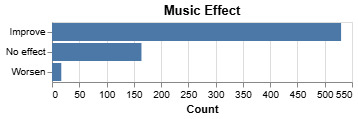

In [33]:
musical_outcome_hist = alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.Y("Music effects:N", title=None, sort = "-x"),
    alt.X("count(Music effects)", title="Count"), 
    alt.Tooltip(["Music effects", "count(Music effects):Q"])
).properties(
    title = "Music Effect"
)
musical_outcome_hist

Based on this plot:
- Most respondants reported that music has improved their mental health compared to no effect
- Very few respondants reported that music worsened their mental health

### 3.3 Bivariate Analysis

Let's explore if any of the numerical features have interesting interactions. 

I will start by making a scatter matrix.

In [34]:
cats = ["Anxiety", "Depression", "Insomnia", "OCD", "BPM", "Age", "Hours per day"]
mental_health_interactions = []
for cat in cats:
    mental_health_interactions.append(alt.Chart(music_cleaned_imputed).mark_circle().encode(
        alt.X(alt.repeat("column"), type = "quantitative"),
        alt.Y(alt.repeat("row"), type = "quantitative")
    ).properties(
        height=120,
        width=120
    ).repeat(
        row = [cat],
        column = ["Anxiety", "Depression", "Insomnia", "OCD", "BPM", "Age", "Hours per day"]
    )
    )

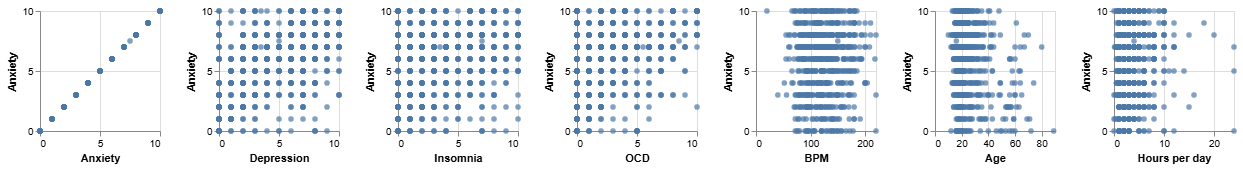

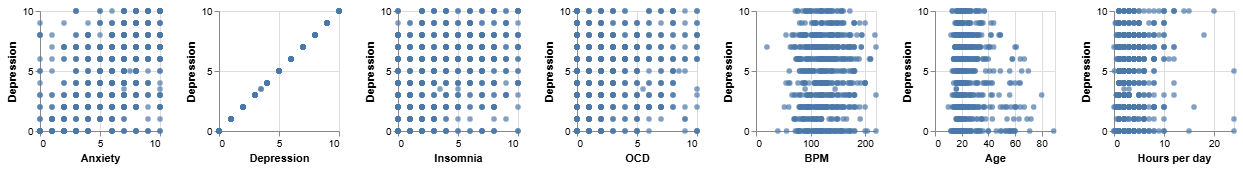

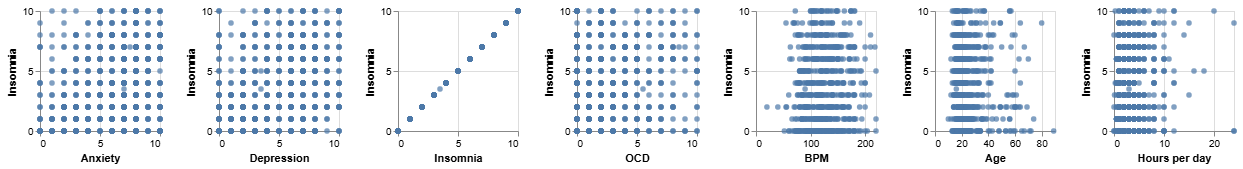

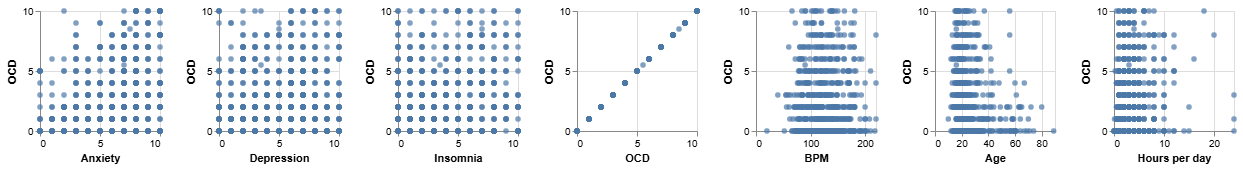

In [35]:
display(mental_health_interactions[0])
display(mental_health_interactions[1])
display(mental_health_interactions[2])
display(mental_health_interactions[3])

- Anxiety: No obvious trends aside from how most of those who reported higher anxiety are also younger in age (15-40).
- Depression: No obvious trends aside from how most of those who reported higher depression are also younger in age (15-40).
- Insomnia: No obvious trend
- OCD: No obvious trends aside from how most of those who reported higher OCD are also younger in age (15-40).

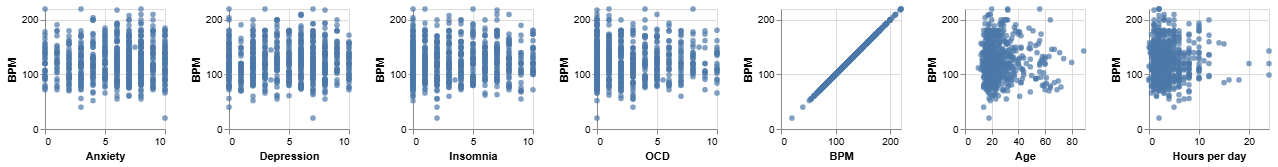

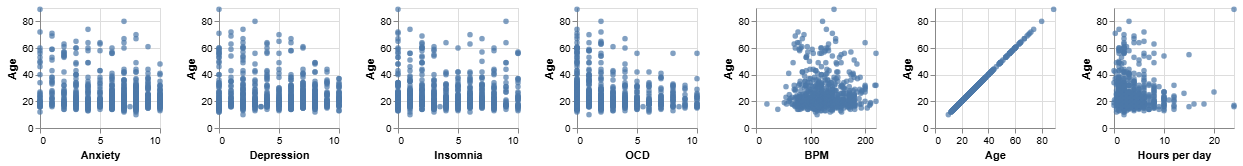

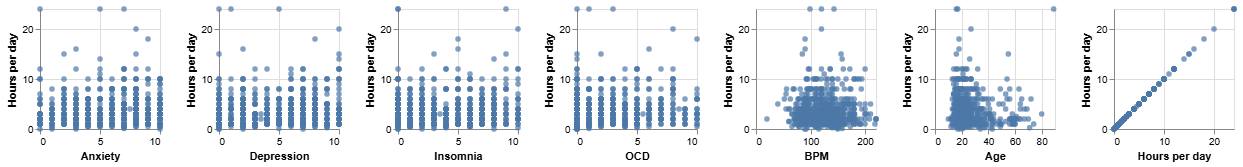

In [36]:
display(mental_health_interactions[4])
display(mental_health_interactions[5])
display(mental_health_interactions[6])

There are no obvious trends that popout, but we can see that for the mental health scores, the values are discrete. Let's examine the cardinality.

In [37]:
for cat in ["Anxiety", "Depression", "Insomnia", "OCD"]:
    unique = [float(x) for x in sorted(music_cleaned_imputed[cat].unique())]
    print(cat + " (" + str(len(unique)) + "): " + str(unique))

Anxiety (12): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 7.5, 8.0, 9.0, 10.0]
Depression (12): [0.0, 1.0, 2.0, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Insomnia (12): [0.0, 1.0, 2.0, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
OCD (13): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 5.5, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0]


All values range from 0 - 10. In addition to using the raw values themselves, it could be helpful to group the variables into levels ranging from low to high. Let's add another column and split the levels.

In [38]:
music_cleaned_imputed['Anxiety_Level'] = pd.cut(
    music_cleaned_imputed['Anxiety'], 
    bins=[0, 3, 6, 10], 
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

music_cleaned_imputed['Depression_Level'] = pd.cut(
    music_cleaned_imputed['Depression'], 
    bins=[0, 3, 6, 10],  
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

music_cleaned_imputed['Insomnia_Level'] = pd.cut(
    music_cleaned_imputed['Insomnia'], 
    bins=[0, 3, 6, 10],  
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

music_cleaned_imputed['OCD_Level'] = pd.cut(
    music_cleaned_imputed['OCD'], 
    bins=[0, 3, 6, 10],  
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

# music_cleaned_imputed.isna().sum()
# Without include_lowest = true, the 3.5, 6.5 etc. values were excluded (set to null)
for cat in ["Anxiety_Level", "Depression_Level", "Insomnia_Level", "OCD_Level"]:
    music_cleaned_imputed[cat] = pd.Categorical(
        music_cleaned_imputed[cat], categories=["Low", "Medium", "High"], ordered=True
    )

In [39]:
music_cleaned_imputed.head(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Depression,Insomnia,OCD,Music effects,Permissions,Has_musical_hobbies,Anxiety_Level,Depression_Level,Insomnia_Level,OCD_Level
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,7.0,10.0,2.0,No effect,I understand.,No,High,High,High,Low
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,7.0,3.0,3.0,Improve,I understand.,Yes,High,High,Low,Low
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,2.0,5.0,9.0,Improve,I understand.,No,High,Low,Medium,High
5,2022-08-27 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,8.0,7.0,7.0,Improve,I understand.,Yes,High,High,High,High
6,2022-08-27 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,8.0,6.0,0.0,Improve,I understand.,Yes,Medium,High,Medium,Low


Let's do the same bivariate scatter matrix, but try labelling the scatter points as different mental health conditions.

---------------------------------------------------------------------------------------------------------------------------


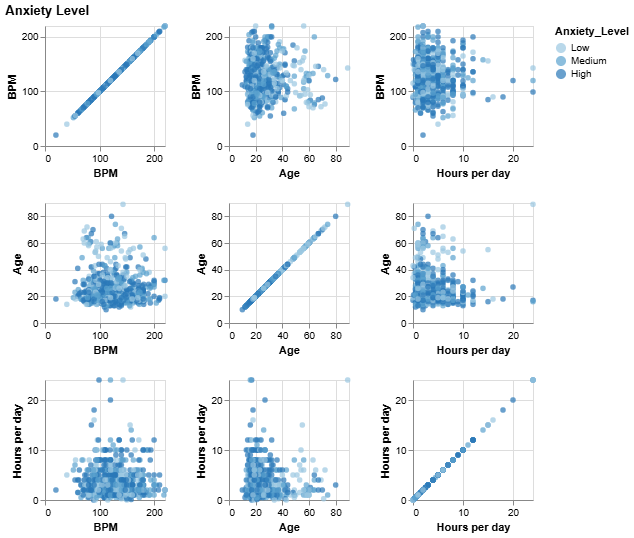

---------------------------------------------------------------------------------------------------------------------------


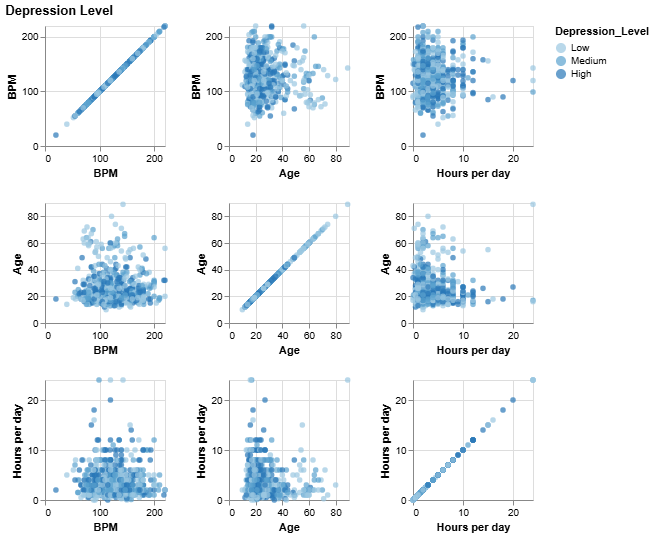

---------------------------------------------------------------------------------------------------------------------------


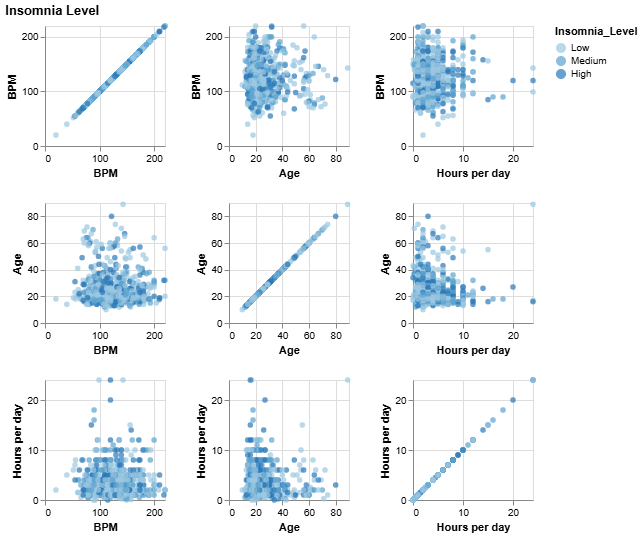

---------------------------------------------------------------------------------------------------------------------------


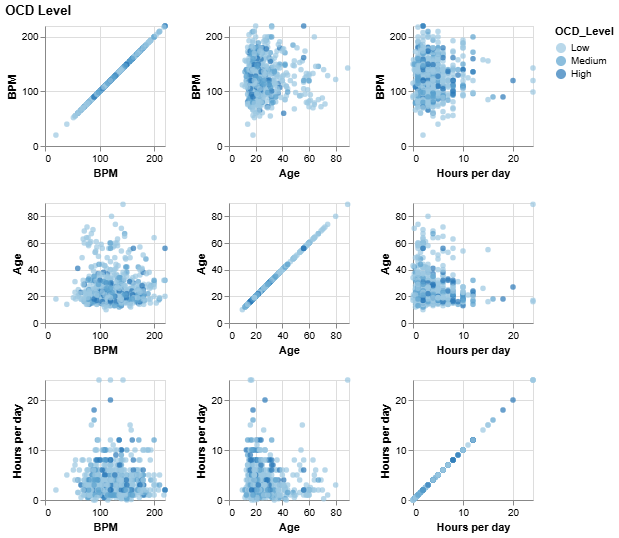

In [40]:

num_cols = ["BPM", "Age", "Hours per day"]

for cat in ["Anxiety_Level", "Depression_Level", "Insomnia_Level", "OCD_Level"]:
    print("---------------------------------------------------------------------------------------------------------------------------")
    display(alt.Chart(music_cleaned_imputed).mark_circle().encode(
        alt.X(alt.repeat("column"), type='quantitative'),
        alt.Y(alt.repeat("row"), type='quantitative'),
        alt.Color(cat, type="ordinal")
    ).properties(
        width=120,
        height=120
    ).repeat(
        row=num_cols,
        column=num_cols
    ).properties(
        title = cat.replace("_", " "),
    )
           )

No obvious trends are visualized given the scatter matrix. Perhaps looking at just a single dimension (age) would reveal more interesting patterns.

### 3.4 Summary: Bivariate and Univariate Analysis

This analysis has shown the distribution of the numerical variables. We have seen that:
1. The mental health condition distribution is left skewed for anxiety, right skewed for OCD and Insomnia, and irregular for depression.
2. Age has a peak between 15-30, suggesting that most respondants are younger
3. Hours per day has a peak between 0-8 hours per day
4. BPM of music has a peak value around 120
5. There are no obvious correlations between numerical columns aside from the more extreme scores for mental health condition being associated with a narrower, younger age.
6. There are no obvious clusters when plotting numerical columns for different level of the different mental health conditions

From this point, I will continue my EDA while only considering age and other features.

## 4. Specific EDA: `Age`

I would like to see if there are any age-specific clusters, such as specific age groups being associated with certain response patterns. 

To accomplish this, I will be binning ages using a 5-year interval. As there is rather sparse respondants between ages 65-90, I will be combining the ages into a single group "66", which will represent 65+.

In [41]:
music_cleaned_imputed["Age_Grouped"] = np.where(music_cleaned_imputed["Age"] > 65, 66, music_cleaned_imputed["Age"])

I will start by looking at the age groups and their reported mental health scores.

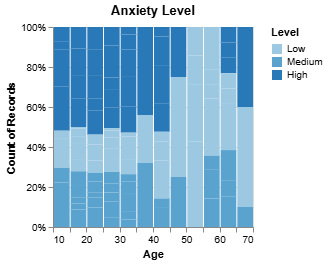

In [42]:
anxiety = alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.X("Age_Grouped:Q", bin=alt.Bin(maxbins=20), title="Age"),
    alt.Y("count():Q", stack="normalize"),
    alt.Color("Anxiety_Level:O", title="Level", 
              sort=["Low", "Medium", "High"]),  
    alt.Tooltip(["Anxiety_Level", "Age", "count()"])
).properties(
    title="Anxiety Level",
    width=200,
    height=200
)


anxiety

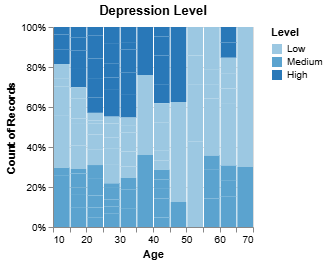

In [43]:
depression = alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.X("Age_Grouped:Q", bin=alt.Bin(maxbins=20), title="Age"),
    alt.Y("count():Q", stack="normalize"),
    alt.Color("Depression_Level:O", title="Level", 
              sort=["Low", "Medium", "High"]), 
    alt.Tooltip(["Depression_Level", "Age", "count()"])
).properties(
    title="Depression Level",
    width=200,
    height=200
)
depression

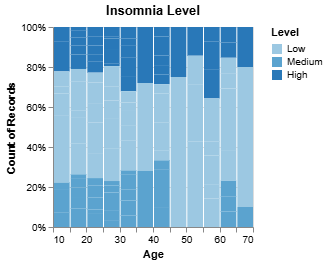

In [44]:
insomnia = alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.X("Age_Grouped:Q", bin=alt.Bin(maxbins=20), title="Age"),
    alt.Y("count():Q", stack="normalize"),
    alt.Color("Insomnia_Level:O", title="Level", 
              sort=["Low", "Medium", "High"]),  
    alt.Tooltip(["Insomnia_Level", "Age", "count()"])
).properties(
    title="Insomnia Level",
    width=200,
    height=200
)
insomnia

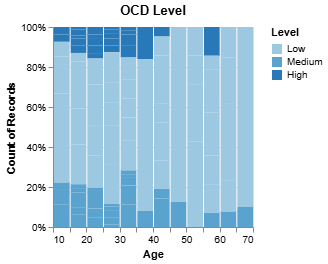

In [45]:
ocd = alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.X("Age_Grouped:Q", bin=alt.Bin(maxbins=20), title="Age"),
    alt.Y("count():Q", stack="normalize"),
    alt.Color("OCD_Level:O", title="Level", 
              sort=["Low", "Medium", "High"]),  
    alt.Tooltip(["OCD_Level", "Age", "count()"])
).properties(
    title="OCD Level",
    width=200,
    height=200
)
ocd

We can see some interesting patterns now:
- For younger people, there is a high proportion reporting higher anxiety compared to older.
- Depression level is high for younger individuals, but less so than anxiety.
- Insomnia is predominantly reported as low
- OCD is consistently reported as low.

Next, I want to see if there are any age-related genre preferences.

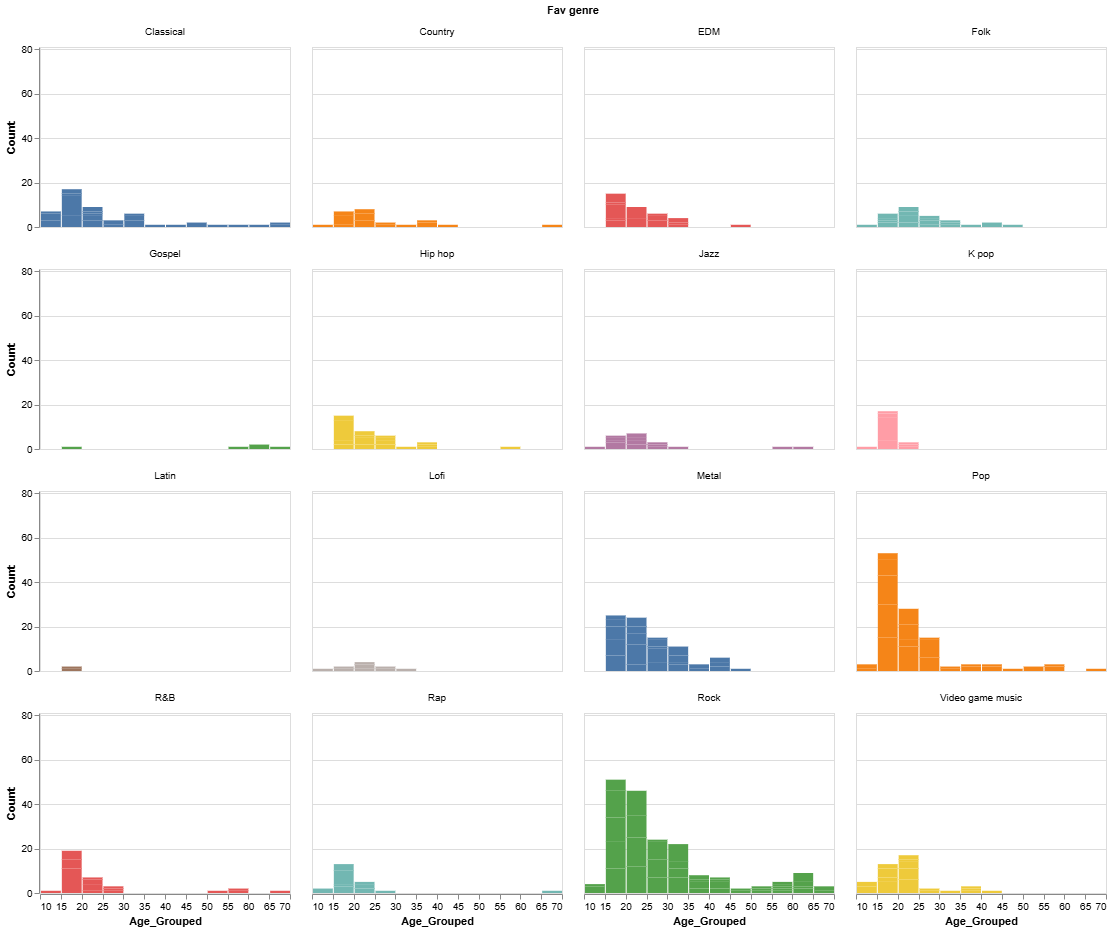

In [46]:
min_age = int(music_cleaned_imputed["Age_Grouped"].min())
max_age = int(music_cleaned_imputed["Age_Grouped"].max() + 4)
max_y = music_cleaned_imputed.groupby("Age_Grouped")["Fav genre"].count().max()


age_genre_hist = alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.X("Age_Grouped:Q", bin=alt.Bin(step=5), title="Age_Grouped",
          
          scale=alt.Scale(domain=[min_age, max_age])),
    alt.Y("count()", title="Count",
          scale=alt.Scale(domain=[0, max_y])),
    alt.Color("Fav genre:N", legend=None),
    tooltip=["Age", "Fav genre", "count()"]
).properties(
    width=250,
    height=180
).facet(
    "Fav genre",
    columns=4
)

age_genre_hist


From this plot:
- The favourite genre of each age group most closely resembles the distribution of age
- Rock displays two (albeit one significantly smaller) peaks at 15-20 years and 60-65
- Video game, Lofi and Kpop are often preferred by younger respondants.
- Gospel is predominately preferred by older respondants.

Now, I will investigate the relationship between age and musical hobbies.

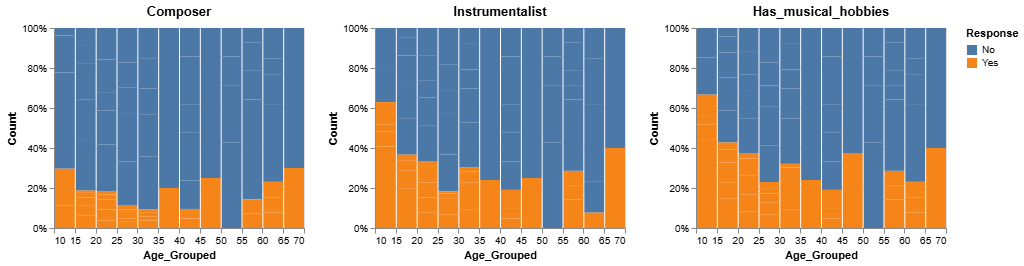

In [47]:
min_age = int(music_cleaned_imputed["Age_Grouped"].min())
max_age = int(music_cleaned_imputed["Age_Grouped"].max() + 4)
cats = ["Composer", "Instrumentalist", "Has_musical_hobbies"]
charts = []
for cat in cats:
    charts.append(alt.Chart(music_cleaned_imputed).mark_bar().encode(
         alt.X("Age_Grouped:Q", bin=alt.Bin(step=5), title="Age_Grouped",
              axis=alt.Axis(values=list(range(min_age, max_age+5, 5))),
              scale=alt.Scale(domain=[min_age, max_age])),
        alt.Y("count()", title="Count", stack="normalize"),
        alt.Color(cat, type="nominal", title="Response"),
        tooltip=["Age", cat, "count()"]
    ).properties(
        width=250,
        height=200,
        title=cat
    )
                 )
final_chart = alt.hconcat(*charts)
final_chart

From this chart, we can observe:
- There are no discernable peak for composer
- The 10-15 age group has the most instrumentalists compared to other ages.
- Most respondants do not have any musical hobbies, aside from the 10-15 bin. It is very similar to the instrumentalist distribution.

Finally, I will look at self-reported outcome of whether music has improved the individual's mental health.

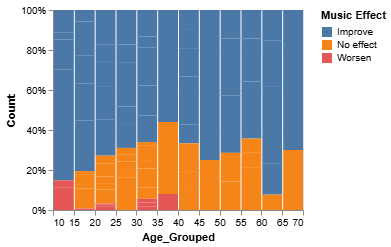

In [48]:
min_age = int(music_cleaned_imputed["Age_Grouped"].min())
max_age = int(music_cleaned_imputed["Age_Grouped"].max() + 4)

music_outcome = alt.Chart(music_cleaned_imputed).mark_bar().encode(
         alt.X("Age_Grouped:Q", bin=alt.Bin(step=5), title="Age_Grouped",
              axis=alt.Axis(values=list(range(min_age, max_age+5, 5))),
              scale=alt.Scale(domain=[min_age, max_age])),
        alt.Y("count()", title="Count", stack="normalize"),
        alt.Color("Music effects", type="nominal", title="Music Effect"),
        tooltip=["Age", "Music effects", "count()"]
    ).properties(
        width=250,
        height=200
    )
music_outcome

From this chart, we can observe:

- Most individuals, regardless of age, report improvement of mental health.
- There is a peak of respondants stating that music has no effect for ages 35-40 and older ages
- The greatest within-age-group proportion of individuals who reported worsening effects from music are in the age group 10-15

## 5. Research questions:

Now that I have performed some EDA, I have come up with some questions I would like to further investigate. Although I did not see any particularly strong patterns, I am interested in creating further groupings to see if I can uncover age-related differnces. 

### Broader Research Question: What is the impact of the respondent's age on their survey responses?

**1. Does Age Influence the Relationship Between Music Genre Preferences and Mental Health Scores?**
- How music preferences correlate with mental health scores for different age groups
- Group similar age-genre-mental health patterns (e.g., young people preferring rock vs. older people preferring jazz)

FINER Breakdown:
- **Feasible**: The dataset contains age, genre preferences, and self-reported mental health scores (anxiety, depression, insomnia, OCD).
- **Interesting**: Understanding if music therapy should be age-specific would be valuable.
- **Novel**: Beyond trivial by asking whether age changes the strength of the relationship between music preferences and mental health scores.
- **Ethical**: The dataset is publicly available and anonymized.
- **Relevant**: This can inform music therapy applications, tailoring music interventions based on age.

**2: How Does Age Influence the Relationship Between Music Engagement and Mental Health Outcomes?**
- Examine how different forms of music engagement (e.g., instrumentalist, composer) correlate with mental health outcomes across various age groups.
- Do those who engage with music in more dimensions (e.g. composer or musician) form distinct groups?

FINER Breakdown:

- **Feasible**: The dataset includes variables on music engagement activities and self-reported mental health scores (anxiety, depression, insomnia, OCD), along with participants' ages.
- **Interesting**: How different roles in music engagement impact mental health differently across age groups can provide insights into age-appropriate therapeutic interventions.
- **Novel**: This question goes further by investigating whether music engagement affects mental health, and if it changes with age.
- **Ethical**: The dataset is publicly available and anonymized.
- **Relevant**: Findings can inform the development of targeted music-based interventions to improve mental health outcomes in specific age demographics.